# Proyek Sains Data
#### PREDIKSI HARGA PENUTUPAN SAHAM HARIAN TOP 1 INDONESIA MENGGUNAKAN ALGORITMA LINEAR REGRESSION

### Kelompok 1:
1. 10121189 - Muhammad Izham Ali Azhar
2. 10121177 - Muhamad Gilang Abdul Gani
3. 10121191 - Harist Muhammad Lutfi
4. 10121194 - Muhamad Repiyan Riski
5. 10121203 - Azka Zaki Ramadhan
6. 10121178 - Faisal Rahman

TODO:
 - Memperbaiki tipe data kolom ke integer bukan float.

### Dataset Preparation

In [1]:
from datetime import datetime, timedelta
import pandas as pd
import yfinance as yf


ticker = "BBCA.JK"

# five_years_ago = (datetime.now() - timedelta(days=5*365)).strftime("%Y-%m-%d")
# data = yf.download(ticker, start=five_years_ago, progress=False)
# data.columns = [ columns[0].lower() for columns in data.columns ]
# data.index.name = data.index.name.lower()
# data.to_csv("dataset_bbca_5y.csv")

dataset = pd.read_csv('dataset_bbca_5y.csv')
dataset = dataset[[*dataset.drop('close', axis=1), 'close']]
dataset.sample(3)

,date,adj close,high,low,open,volume,close
171,2020-08-10 00:00:00+00:00,5583.705566,6200.0,6105.0,6180.0,37774500,6120.0
62,2020-02-26 00:00:00+00:00,5757.878418,6535.0,6420.0,6500.0,92824500,6420.0
1096,2024-06-12 00:00:00+00:00,9204.093750,9325.0,9250.0,9300.0,49785700,9250.0


In [2]:
# Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1205 non-null   object 
 1   adj close  1205 non-null   float64
 2   high       1205 non-null   float64
 3   low        1205 non-null   float64
 4   open       1205 non-null   float64
 5   volume     1205 non-null   int64  
 6   close      1205 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 66.0+ KB


In [3]:
# Describe
dataset.describe()

,adj close,high,low,open,volume,close
count,1205.000000,1205.000000,1205.000000,1205.000000,1.205000e+03,1205.000000
mean,7431.338128,7908.008299,7764.780083,7837.551867,8.789421e+07,7835.618257
std,1623.743308,1479.510003,1482.434083,1479.301804,5.752057e+07,1483.104813
min,3973.115723,4800.000000,4325.000000,4450.000000,0.000000e+00,4430.000000
25%,5994.272461,6580.000000,6480.000000,6520.000000,5.667200e+07,6530.000000
50%,7279.159668,7850.000000,7700.000000,7775.000000,7.504830e+07,7775.000000
75%,8760.451172,9100.000000,9000.000000,9050.000000,1.022386e+08,9050.000000
max,10895.657227,10950.000000,10775.000000,10900.000000,7.564316e+08,10950.000000


### Preprocessing

In [4]:
# Preprocessing - Remove missing values
display(dataset.isna().sum(), )
dataset.dropna(inplace=True)

date         0
adj close    0
high         0
low          0
open         0
volume       0
close        0
dtype: int64

In [5]:
# Preprocessing - Transformation (MinMax, 0-1)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# to_scale = dataset.columns.difference(['date', 'close'])
# dataset[to_scale] = scaler.fit_transform(dataset[to_scale])

dataset.sample(5)

,date,adj close,high,low,open,volume,close
1150,2024-08-29 00:00:00+00:00,10174.254883,10500.0,10225.0,10500.0,53004700,10225.0
713,2022-10-31 00:00:00+00:00,8319.039062,8850.0,8775.0,8850.0,138922800,8800.0
147,2020-07-06 00:00:00+00:00,5414.916992,5935.0,5850.0,5860.0,67800000,5935.0
321,2021-03-25 00:00:00+00:00,5829.403320,6440.0,6330.0,6400.0,119101500,6370.0
100,2020-04-22 00:00:00+00:00,4694.144531,5235.0,5045.0,5160.0,107263500,5145.0


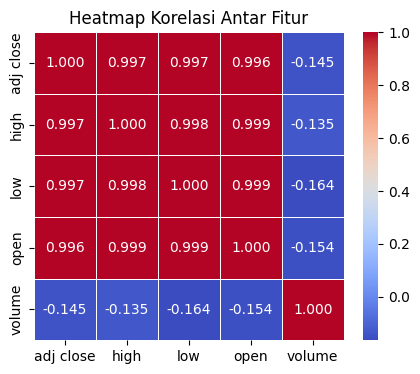

,date,adj close,high,low,open,close
2,2019-11-28 00:00:00+00:00,5587.728516,6295.0,6245.0,6295.0,6250.0
1179,2024-10-10 00:00:00+00:00,10447.890625,10500.0,10400.0,10425.0,10500.0
144,2020-07-01 00:00:00+00:00,5291.747070,5800.0,5675.0,5700.0,5800.0
454,2021-10-11 00:00:00+00:00,6732.365234,7290.0,7230.0,7240.0,7255.0
256,2020-12-16 00:00:00+00:00,6360.181152,6950.0,6840.0,6860.0,6950.0


In [6]:
# Preprocessing - Feature Selection (Pearson Correlation)
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = dataset.drop(columns=['date', 'close']).corr(numeric_only=True)

plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)

plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

# Drop 'volume' because it has negative correlation.
dataset.drop(columns=['volume'], inplace=True)

dataset.sample(5)

In [7]:
# Dataset split train test
from sklearn.model_selection import train_test_split

x = dataset.drop(columns=['close'])
y = dataset['close']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

train_date = x_train['date']
x_train.drop(columns=['date'], inplace=True)

test_date = x_test['date']
x_test.drop(columns=['date'], inplace=True)

### Modeling

In [8]:
# Train the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Mean Absolute Error (MAE): 56.04177468802636
Mean Squared Error (MSE): 4815.222910571197
Root Mean Squared Error (RMSE): 69.39180722946475


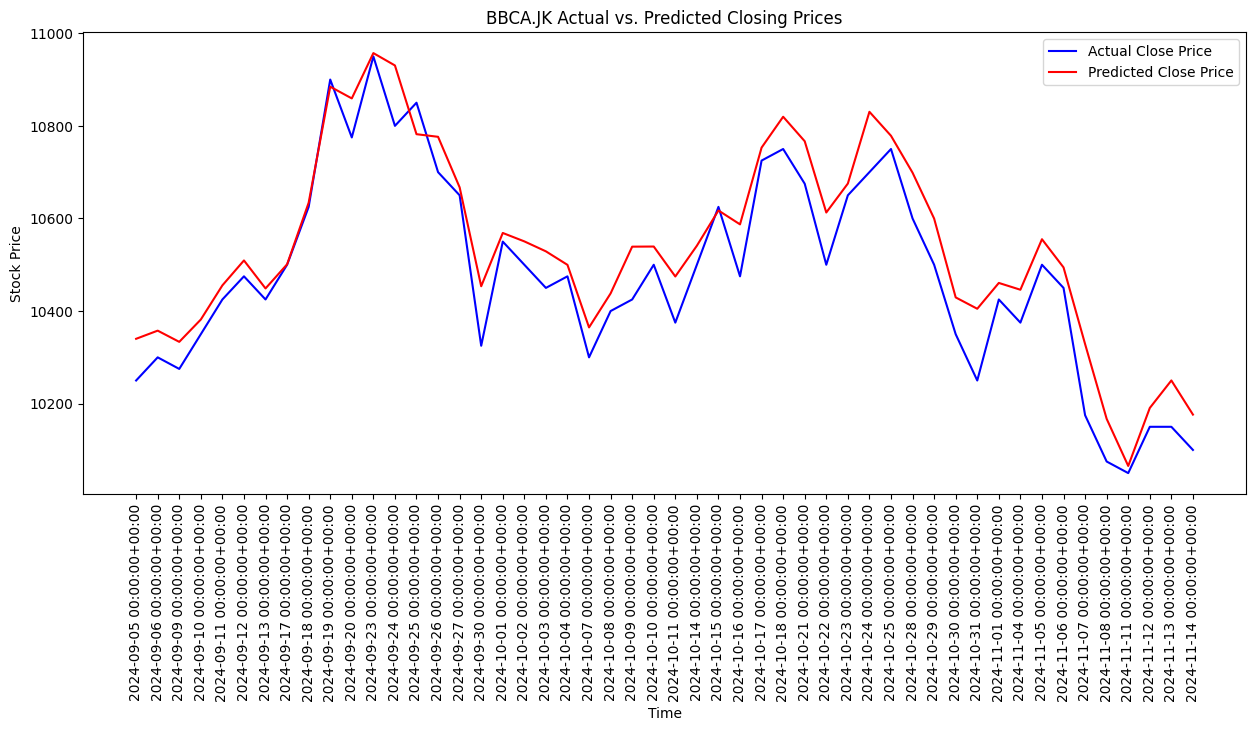

In [ ]:
# Testing and Evaluation
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

plt.figure(figsize=(15, 6))
plt.plot(y_test.values[-50:], label="Actual Close Price", color="blue")
plt.plot(test_date[-50:], y_pred[-50:], label="Predicted Close Price", color="red")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.xticks(rotation=90)
plt.title(f"{ticker} Actual vs. Predicted Closing Prices")
plt.legend()
plt.show()

RMSE: 127.57
MAPE: 0.99%


d:\program_files\softwares\miniconda3\envs\proksi\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\program_files\softwares\miniconda3\envs\proksi\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\program_files\softwares\miniconda3\envs\proksi\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\program_files\softwares\miniconda3\envs\proksi\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\program_files\softwares\miniconda3\envs\proksi\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted w

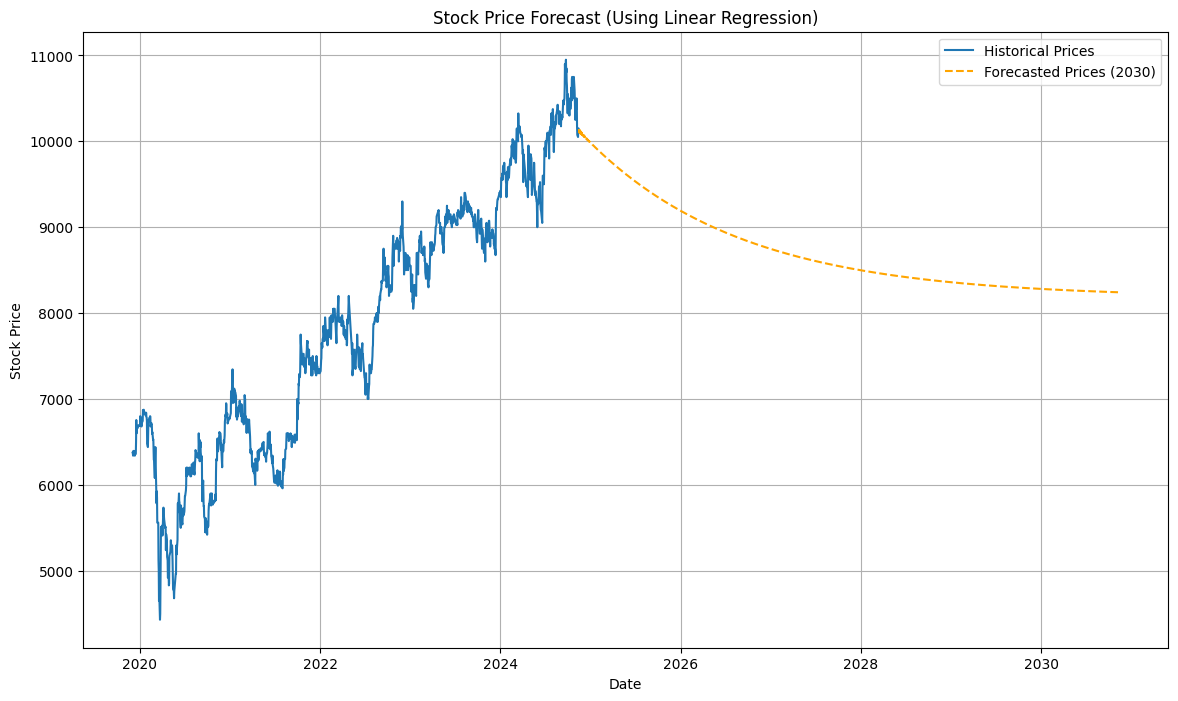

In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Step 1: Load the Data
# Replace 'your_stock_data.csv' with your dataset file
data = pd.read_csv('dataset_bbca_5y.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Ensure the dataset has a 'Close' column for stock prices
data = data[['close']]

# Step 2: Feature Engineering
# Create lag features for time series forecasting
for lag in range(1, 6):  # Using 5 lags
    data[f'Lag{lag}'] = data['close'].shift(lag)

# Drop rows with NaN values after creating lag features
data.dropna(inplace=True)

# Step 3: Split the Data
X = data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']]  # Features: Lag values
y = data['close']  # Target: Close prices

# Split into training and testing datasets
train_size = int(len(data) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 4: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape * 100:.2f}%")

# Step 6: Forecast Future Prices (Recursive Predictions)
last_known_date = data.index[-1]
future_dates = [last_known_date + timedelta(days=i) for i in range(1, 365 * 6)]  # Predict until 2030
future_data = data[['close', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']].copy()

# Start recursive predictions
for date in future_dates:
    last_row = future_data.iloc[-1]  # Get the last row for lag values
    new_prediction = model.predict([last_row[1:].values])[0]  # Use lags for prediction
    future_data.loc[date] = [new_prediction] + list(future_data.iloc[-1]['close':'Lag4'].values)

# Extract predicted values
forecasted_prices = future_data.loc[future_dates, 'close']

# Step 7: Visualize the Results
plt.figure(figsize=(14, 8))
plt.plot(data.index, data['close'], label='Historical Prices')
plt.plot(future_dates, forecasted_prices, label='Forecasted Prices (2030)', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Forecast (Using Linear Regression)')
plt.legend()
plt.grid()
plt.show()


C:\Users\aliazhar\AppData\Local\Temp\ipykernel_8708\1713371605.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').mean()
d:\program_files\softwares\miniconda3\envs\proksi\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\program_files\softwares\miniconda3\envs\proksi\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\program_files\softwares\miniconda3\envs\proksi\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\program_files\softwares\miniconda3\envs\proksi\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fit

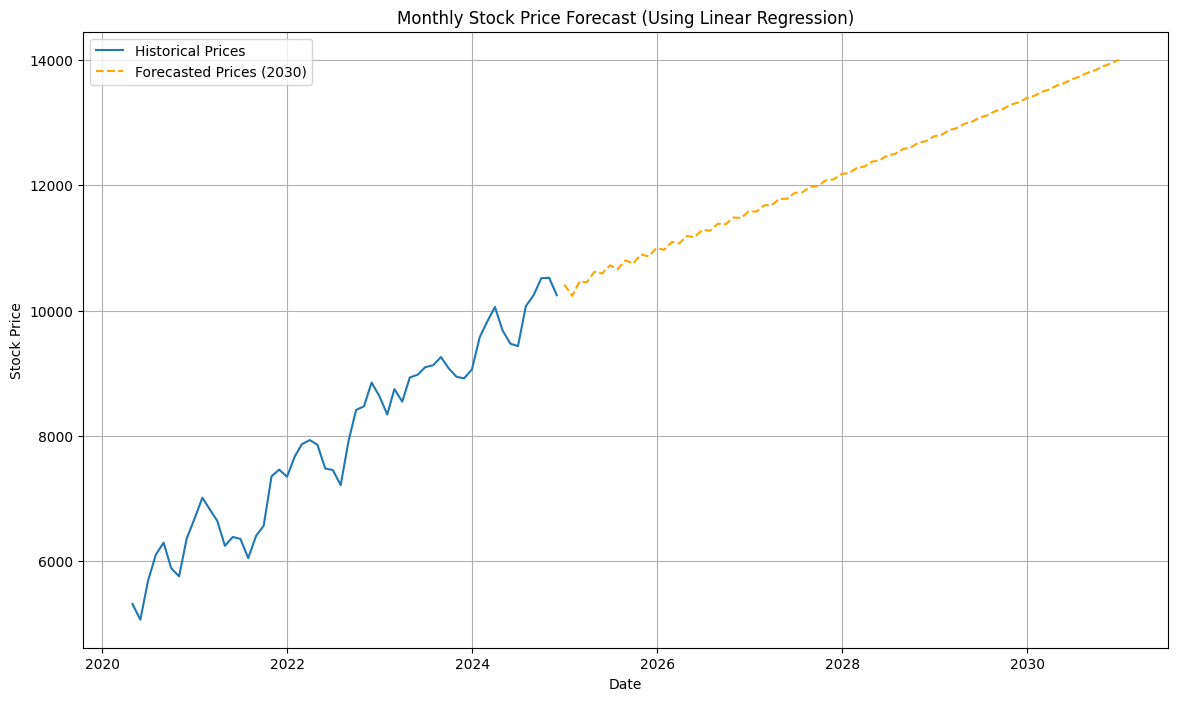

RMSE (Training): 259.31
MAPE (Training): 2.66%


In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Step 1: Load the Data
# Replace 'your_stock_data.csv' with your dataset file
data = pd.read_csv('dataset_bbca_5y.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Ensure the dataset has a 'close' column for stock prices
data = data[['close']]

# Step 2: Resample Data to Monthly
# Aggregate by month (use mean or last value)
monthly_data = data.resample('M').mean()

# Create lag features for time series forecasting
for lag in range(1, 6):  # Using 5 lags
    monthly_data[f'Lag{lag}'] = monthly_data['close'].shift(lag)

# Drop rows with NaN values after creating lag features
monthly_data.dropna(inplace=True)

# Step 3: Prepare Features and Target
X = monthly_data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']]
y = monthly_data['close']

# Step 4: Train the Model
model = LinearRegression()
model.fit(X, y)

# Step 5: Predict Future Prices Month by Month
# Define the number of months to predict (e.g., until 2030)
current_date = monthly_data.index[-1]
months_to_predict = (2030 - current_date.year) * 12 + (12 - current_date.month)

# Prepare to store predictions
future_dates = []
predicted_prices = []

# Start recursive monthly predictions
last_row = monthly_data.iloc[-1]  # Get the last row for lag values
for _ in range(months_to_predict):
    # Predict the next month's price
    prediction = model.predict([last_row[1:].values])[0]
    predicted_prices.append(prediction)
    
    # Update lag features for the next prediction
    new_row = [prediction] + list(last_row['close':'Lag4'].values)
    last_row = pd.Series(new_row, index=monthly_data.columns)
    
    # Update the date
    current_date = current_date + pd.DateOffset(months=1)
    future_dates.append(current_date)

# Step 6: Combine Historical and Forecasted Data
future_predictions = pd.DataFrame({'Date': future_dates, 'Predicted_Close': predicted_prices})
future_predictions.set_index('Date', inplace=True)

# Combine historical and forecasted data for visualization
combined_data = pd.concat([monthly_data[['close']], future_predictions])

# Step 7: Visualize the Results
plt.figure(figsize=(14, 8))
plt.plot(monthly_data.index, monthly_data['close'], label='Historical Prices')
plt.plot(future_predictions.index, future_predictions['Predicted_Close'], label='Forecasted Prices (2030)', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Monthly Stock Price Forecast (Using Linear Regression)')
plt.legend()
plt.grid()
plt.show()

# Step 8: Evaluate the Model (Optional, on historical data)
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mape = mean_absolute_percentage_error(y, y_pred)

print(f"RMSE (Training): {rmse:.2f}")
print(f"MAPE (Training): {mape * 100:.2f}%")


## Predictions

C:\Users\aliazhar\AppData\Local\Temp\ipykernel_8708\4246334114.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([dataset, future_data], ignore_index=True)


,date,adj close,high,low,open,close
0,2024-11-15 00:00:00+00:00,5727.239416,10527.500000,10350.000000,10100.000000,6269.370188
1,2024-11-16 00:00:00+00:00,5727.197022,10529.250000,10350.000000,6269.370188,6269.414483
2,2024-11-17 00:00:00+00:00,5726.869189,10534.391667,10353.333333,6269.414483,6225.487271
3,2024-11-18 00:00:00+00:00,5725.945717,10535.538056,10360.111111,6225.487271,6225.128825


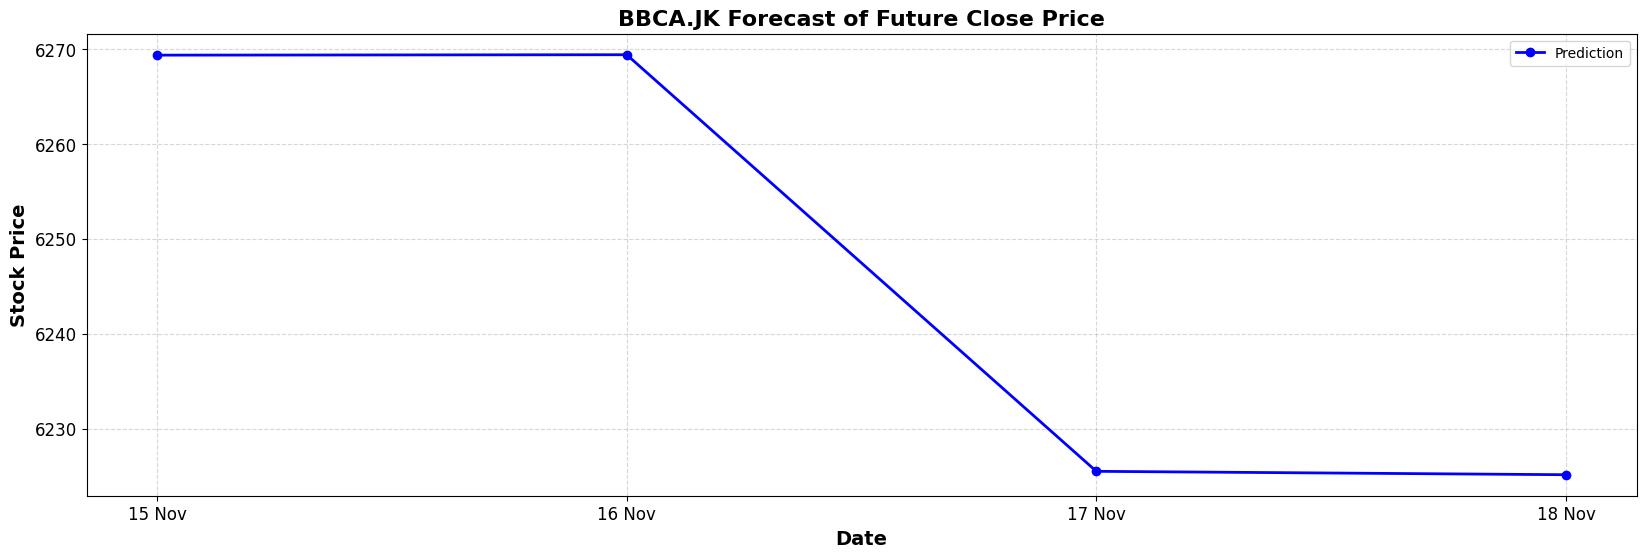

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

def predict(data, to_predict):
  data = data.drop(columns=['date'])
  last = data.drop(columns=[to_predict]).iloc[:1]
  data = data.iloc[:-1]

  x = data.drop(columns=[to_predict])
  y = data[to_predict]

  model = LinearRegression()
  model.fit(x, y)

  y_pred = model.predict(last)
  return y_pred[0]

predictions = []
close_results = []

for i in range(1, 5):
  future_data = pd.DataFrame(predictions, columns=dataset.columns.to_list())
  data = pd.concat([dataset, future_data], ignore_index=True)

  prediction = []

  # prediction.append(pd.Timestamp(data.iloc[-1]['date']).normalize() + pd.Timedelta(days=1))
  # prediction.append(predict(data, 'adj close'))
  # prediction.append(predict(data, 'high'))
  # prediction.append(predict(data, 'low'))
  # prediction.append(predict(data, 'open'))
  # prediction.append(predict(data, 'volume'))
  # prediction.append(predict(data, 'close'))

  prediction.append(pd.Timestamp(data.iloc[-1]['date']).normalize() + pd.Timedelta(days=1))
  prediction.append(predict(data, 'adj close'))
  prediction.append(data['high'].iloc[-30:].mean())
  prediction.append(data['low'].iloc[-30:].mean())
  prediction.append(data.iloc[-1]['close'])
  prediction.append(predict(data, 'close'))

  predictions.append(prediction)

results = pd.DataFrame(predictions, columns=dataset.columns.to_list())

display(results)

fig, ax = plt.subplots(figsize=(20, 6))
line, = ax.plot(results['date'].apply(lambda x: x.strftime('%d %b')), results['close'].values, label="Prediction", color="blue", linewidth=2, marker='o', markersize=6)
ax.set_xlabel("Date", fontsize=14, fontweight='bold')
ax.set_ylabel("Stock Price", fontsize=14, fontweight='bold')
ax.set_title(f"{ticker} Forecast of Future Close Price", fontsize=16, fontweight='bold')
ax.legend()

ax.grid(visible=True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [21]:
dataset

,date,adj close,high,low,open,close
0,2019-11-26 00:00:00+00:00,5619.020020,6330.0,6270.0,6330.0,6285.0
1,2019-11-27 00:00:00+00:00,5632.429688,6300.0,6240.0,6270.0,6300.0
2,2019-11-28 00:00:00+00:00,5587.728516,6295.0,6245.0,6295.0,6250.0
3,2019-11-29 00:00:00+00:00,5614.549316,6295.0,6225.0,6230.0,6280.0
4,2019-12-02 00:00:00+00:00,5744.185059,6425.0,6270.0,6280.0,6425.0
...,...,...,...,...,...,...
1200,2024-11-08 00:00:00+00:00,10025.000000,10225.0,10050.0,10200.0,10075.0
1201,2024-11-11 00:00:00+00:00,10000.124023,10050.0,9800.0,9800.0,10050.0
1202,2024-11-12 00:00:00+00:00,10099.627930,10225.0,10000.0,10100.0,10150.0
1203,2024-11-13 00:00:00+00:00,10099.627930,10250.0,10150.0,10225.0,10150.0


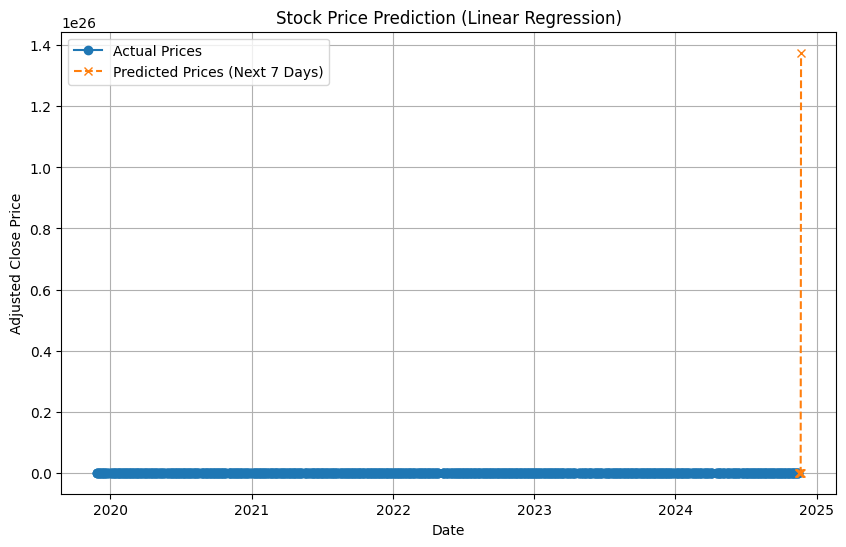

2024-11-15: 9916.00
2024-11-16: 48611073.18
2024-11-17: 238277818540.90
2024-11-18: 1167970870751826.75
2024-11-19: 5725064814138674176.00
2024-11-20: 28062658022447425519616.00
2024-11-21: 137555259346581341601792000.00


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# # Data setup
# data = {
#     'date': [
#         '2019-11-26', '2019-11-27', '2019-11-28', '2019-11-29',
#         '2019-12-02', '2019-12-03'
#     ],
#     'adj close': [
#         5619.02, 5632.43, 5587.73, 5614.55, 5744.19, 5699.48
#     ],
#     'close': [6285, 6300, 6250, 6280, 6425, 6375],
#     'high': [6330, 6300, 6295, 6295, 6425, 6420],
#     'low': [6270, 6240, 6245, 6225, 6270, 6345],
#     'open': [6330, 6270, 6295, 6230, 6280, 6420],
#     'volume': [192783500, 58833500, 44248000, 52954500, 49909000, 42823000]
# }

# Convert data into DataFrame
df = dataset.copy()
df['date'] = pd.to_datetime(df['date'])

# Feature selection (using 'high', 'low', 'open', 'volume')
features = df[['high', 'low', 'open']]
target = df['adj close']

# Normalize data
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the next 7 days
last_known_features = features_scaled[-1].reshape(1, -1)  # Start from the last known data point
predicted_prices = []

for _ in range(7):
    predicted_price = model.predict(last_known_features)[0]
    predicted_prices.append(predicted_price)

    # Create next input using predicted price (use last input and replace adj close)
    next_input = np.array(last_known_features).flatten()
    next_input[0] = predicted_price  # Assuming the predicted price will impact 'high'
    last_known_features = next_input.reshape(1, -1)

# Visualize the results
plt.figure(figsize=(10, 6))

# Plot actual data
plt.plot(df['date'], df['adj close'], label='Actual Prices', marker='o')

# Plot predictions
future_dates = [df['date'].iloc[-1] + pd.Timedelta(days=i+1) for i in range(7)]
plt.plot(future_dates, predicted_prices, label='Predicted Prices (Next 7 Days)', marker='x', linestyle='--')

plt.title('Stock Price Prediction (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid()
plt.show()

# Display predicted prices
for date, price in zip(future_dates, predicted_prices):
    print(f"{date.date()}: {price:.2f}")


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# 1. Load Dataset
df = pd.read_csv('dataset_bbca_5y.csv')  # Ganti dengan file dataset Anda
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# 2. Feature Engineering
# Menambahkan lag untuk multi-step forecasting
forecast_days = 5  # Jumlah hari yang ingin diprediksi
for i in range(1, forecast_days + 1):
    df[f'lag_{i}'] = df['close'].shift(i)

# Menghapus nilai NaN setelah penambahan lag
df.dropna(inplace=True)

# 3. Normalisasi (opsional)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# 4. Membuat Data Training dan Testing
X = scaled_data[:, 1:]  # Fitur (tanpa kolom 'close' asli)
y = scaled_data[:, 0]   # Target adalah kolom 'close'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Membuat dan Melatih Model
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Evaluasi Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# 7. Prediksi Masa Depan
last_row = scaled_data[-1, 1:]  # Fitur terakhir
future_forecast = []
current_input = last_row

for _ in range(forecast_days):
    pred = model.predict(current_input.reshape(1, -1))[0]
    future_forecast.append(pred)
    current_input = np.append(current_input[1:], pred)

# Menambahkan dummy kolom sesuai jumlah fitur asli
dummy_features = np.zeros((len(future_forecast), scaled_data.shape[1] - 1))
future_scaled = np.column_stack((future_forecast, dummy_features))

# Denormalisasi hasil prediksi
future_forecast = scaler.inverse_transform(future_scaled)[:, 0]

print(f"Prediksi harga penutupan untuk {forecast_days} hari ke depan: {future_forecast}")




Mean Squared Error: 0.00021040865183617635
Prediksi harga penutupan untuk 5 hari ke depan: [ 9914.40432482  9257.33406448 11129.97882787 10097.26771134
  4430.07695397]


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

array([ 9914.40432482,  9257.33406448, 11129.97882787, 10097.26771134,
        4430.07695397])

array([[0.85825251, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.76333502, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [1.03384907, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.88466815, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.06601062, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

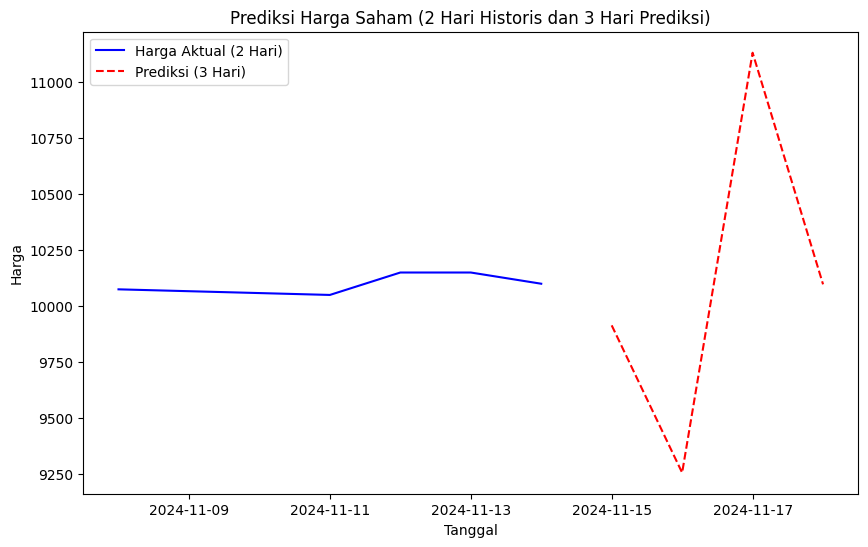

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# 1. Load Dataset
df = pd.read_csv('dataset_bbca_5y.csv')  # Ganti dengan dataset Anda
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# 2. Feature Engineering
forecast_days = 5
for i in range(1, forecast_days + 1):
    df[f'lag_{i}'] = df['close'].shift(i)
df.dropna(inplace=True)

# 3. Normalisasi (opsional)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# 4. Membuat Data Training dan Testing
X = scaled_data[:, 1:]  # Fitur
y = scaled_data[:, 0]   # Target (close)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Membuat dan Melatih Model
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Prediksi Masa Depan
last_row = scaled_data[-1, 1:]
future_forecast = []
current_input = last_row

for _ in range(forecast_days):
    pred = model.predict(current_input.reshape(1, -1))[0]
    future_forecast.append(pred)
    current_input = np.append(current_input[1:], pred)

# Denormalisasi hasil prediksi
dummy_features = np.zeros((len(future_forecast), scaled_data.shape[1] - 1))
future_scaled = np.column_stack((future_forecast, dummy_features))
future_forecast = scaler.inverse_transform(future_scaled)[:, 0]

display(dummy_features, future_forecast, future_scaled)

# 7. Visualisasi (Hanya 2 hari historis dan 3 hari prediksi)
plt.figure(figsize=(10, 6))

# Ambil 2 hari terakhir dari data historis
historical_days = 5
historical_data = df['close'].iloc[-historical_days:]

# Data historis
plt.plot(historical_data.index, historical_data, label='Harga Aktual (2 Hari)', color='blue')

# Tanggal untuk prediksi
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=4)
plt.plot(future_dates, future_forecast[:4], label='Prediksi (3 Hari)', color='red', linestyle='--')

# Pengaturan plot
plt.title('Prediksi Harga Saham (2 Hari Historis dan 3 Hari Prediksi)')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()


In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 1. Load Dataset
df = pd.read_csv('dataset_bbca_5y.csv')  # Ganti dengan file dataset Anda
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Fokus pada kolom 'close' saja untuk prediksi
data = df[['close']].values

# 2. Normalisasi Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# 3. Membuat Dataset untuk LSTM
def create_sequences(data, seq_length, forecast_steps):
    X, y = [], []
    for i in range(len(data) - seq_length - forecast_steps + 1):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length:i + seq_length + forecast_steps])
    return np.array(X), np.array(y)

sequence_length = 30  # Panjang input sekuens
forecast_steps = 5    # Hari yang diprediksi ke depan

X, y = create_sequences(scaled_data, sequence_length, forecast_steps)

# 4. Membagi Data Training dan Testing
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# 5. Membuat Model LSTM
model = Sequential([
    LSTM(64, activation='relu', return_sequences=False, input_shape=(sequence_length, 1)),
    Dense(forecast_steps)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# 6. Melatih Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# 7. Evaluasi Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test.flatten(), y_pred.flatten())
print(f"Mean Squared Error: {mse}")

# 8. Prediksi Masa Depan
last_sequence = scaled_data[-sequence_length:]  # Mengambil urutan terakhir
current_input = last_sequence.reshape(1, sequence_length, 1)

future_forecast = []
for _ in range(forecast_steps):
    pred = model.predict(current_input)[0]
    future_forecast.extend(pred)  # Simpan prediksi
    # Perbarui input dengan menambahkan prediksi terbaru
    current_input = np.append(current_input[:, 1:, :], pred.reshape(1, -1, 1), axis=1)

# Denormalisasi hasil prediksi
future_forecast = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1)).flatten()

print(f"Prediksi harga penutupan untuk {forecast_steps} hari ke depan: {future_forecast}")


Epoch 1/50


d:\program_files\softwares\miniconda3\envs\proksi\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1915 - val_loss: 0.0482
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0178 - val_loss: 0.0039
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0034 - val_loss: 0.0217
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0024 - val_loss: 0.0140
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019 - val_loss: 0.0099
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0020 - val_loss: 0.0062
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0017 - val_loss: 0.0025
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019 - val_loss: 0.0050
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015 - val_loss: 0.0033
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015 - val_loss: 0.0032
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015 - val_loss: 0.0019

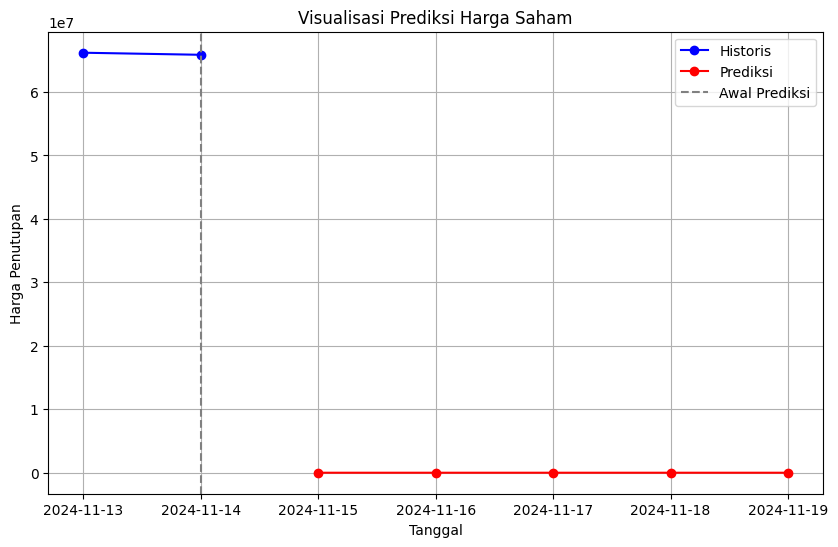

In [16]:
import matplotlib.pyplot as plt

# 9. Visualisasi 2 Hari Historis dan 3 Hari Prediksi
historical_days = 2  # Jumlah hari historis terakhir
historical_data = data[-historical_days:]  # Mengambil data asli 2 hari terakhir

# Denormalisasi data historis untuk visualisasi
historical_data = scaler.inverse_transform(historical_data)

# Gabungkan data historis dan prediksi untuk visualisasi
visual_data = np.append(historical_data.flatten(), future_forecast[:forecast_steps])

# Membuat indeks waktu untuk visualisasi
historical_dates = df.index[-historical_days:].tolist()
future_dates = pd.date_range(historical_dates[-1] + pd.Timedelta(days=1), periods=forecast_steps).tolist()

# Pastikan panjangnya sesuai
all_dates = historical_dates + future_dates

if len(all_dates) != len(visual_data):
    raise ValueError(f"Jumlah tanggal ({len(all_dates)}) dan data ({len(visual_data)}) tidak sesuai!")

# Plot data historis dan prediksi
plt.figure(figsize=(10, 6))
plt.plot(all_dates[:historical_days], visual_data[:historical_days], label="Historis", marker="o", color="blue")
plt.plot(all_dates[historical_days:], visual_data[historical_days:], label="Prediksi", marker="o", color="red")

plt.axvline(x=historical_dates[-1], linestyle="--", color="gray", label="Awal Prediksi")
plt.title("Visualisasi Prediksi Harga Saham")
plt.xlabel("Tanggal")
plt.ylabel("Harga Penutupan")
plt.legend()
plt.grid()
plt.show()



In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# 1. Load Dataset
df = pd.read_csv('dataset_bbca_5y.csv')  # Ganti dengan file dataset Anda
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# 2. Feature Engineering: Lagging
forecast_days = 5  # Jumlah hari untuk prediksi
for i in range(1, forecast_days + 1):
    df[f'lag_{i}'] = df['close'].shift(i)

df.dropna(inplace=True)

# 3. Normalisasi Data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# 4. Membuat Data Training dan Testing
X = scaled_data[:, 1:]  # Fitur (tanpa kolom 'close' asli)
y = scaled_data[:, 0]   # Target adalah kolom 'close'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Membuat dan Melatih Model SGDRegressor
model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train, y_train)

# 6. Evaluasi Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# 7. Prediksi Masa Depan
last_row = scaled_data[-1, 1:]  # Data terakhir untuk prediksi
future_forecast = []
current_input = last_row

for _ in range(forecast_days):
    pred = model.predict(current_input.reshape(1, -1))[0]
    future_forecast.append(pred)
    # Update input untuk iterasi berikutnya
    current_input = np.append(current_input[1:], pred)

# Denormalisasi hasil prediksi
future_forecast = scaler.inverse_transform([[0] + future_forecast])[0][1:]

# 8. Visualisasi
historical_close = df['close'][-2:].values  # 2 nilai historis terakhir
dates = pd.date_range(start=df.index[-1], periods=forecast_days + 2, freq='D')

# Gabungkan data historis dan prediksi
combined_data = np.concatenate([historical_close, future_forecast])

plt.figure(figsize=(10, 6))
plt.plot(dates[:2], historical_close, label="Data Historis", color="blue", marker="o")
plt.plot(dates[1:], combined_data, label="Prediksi", color="red", marker="o", linestyle="--")
plt.title("Prediksi Harga Saham Harian")
plt.xlabel("Tanggal")
plt.ylabel("Harga Saham")
plt.legend()
plt.grid()
plt.show()


Mean Squared Error: 0.0007848450765347864


ValueError: operands could not be broadcast together with shapes (1,6) (11,) (1,6) 